<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/C%C3%B3pia_de_Filtros_notch_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pydub

In [2]:
import numpy as np
import aifc
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
from pydub import AudioSegment

# Filtros Notch

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded)) # Get name of the uploaded file

Saving Cello.arco.ff.sulA.F5.stereo.wav to Cello.arco.ff.sulA.F5.stereo (2).wav


In [3]:
[fs_audio1,audio1]=wavfile.read("Cello.arco.ff.sulA.F5.stereo.wav")
#audio = audio[:,0] # Pegando só o canal da esquerda
audio1 = audio1.astype(np.float32)
Audio(audio1, rate=fs_audio1)

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded)) # Get name of the uploaded file

Saving Cello.arco.ff.sulD.Db5.stereo.wav to Cello.arco.ff.sulD.Db5.stereo (3).wav


In [4]:
[fs_audio2,audio2]=wavfile.read("Cello.arco.ff.sulD.Db5.stereo.wav")
#audio2 = audio2[:,0] # Pegando só o canal da esquerda
audio2 = audio2.astype(np.float32)
Audio(audio2, rate=fs_audio2)#


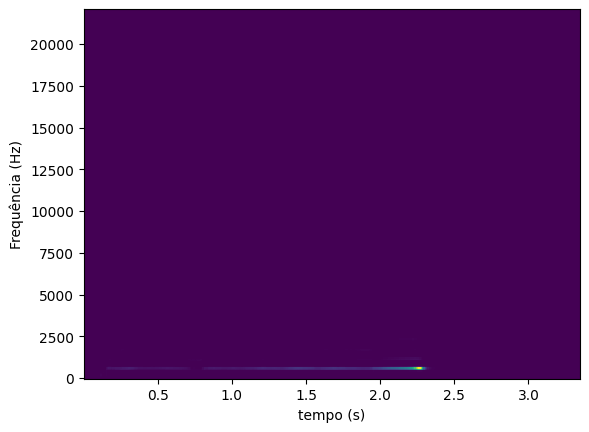

In [5]:
freq,tempo,potencia = signal.spectrogram(audio2,fs_audio2,window='hann', nperseg=512, noverlap=128)
#freq,tempo,potencia = signal.spectrogram(y0,Fs,'hamming',128,64)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
plt.pcolormesh(tempo,freq,potencia)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

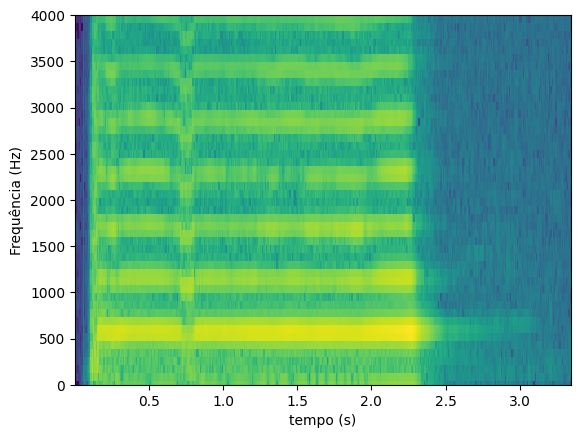

In [7]:
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0,4000])
plt.show()

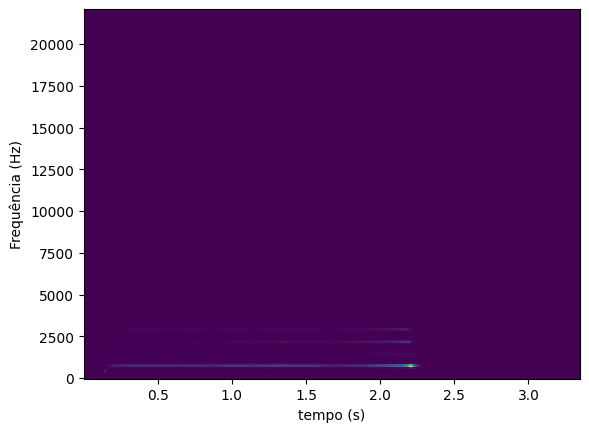

In [15]:
freq,tempo,potencia = signal.spectrogram(audio1,fs_audio1,window='hann', nperseg=512, noverlap=128)
#freq,tempo,potencia = signal.spectrogram(y0,Fs,'hamming',128,64)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
plt.pcolormesh(tempo,freq,potencia)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

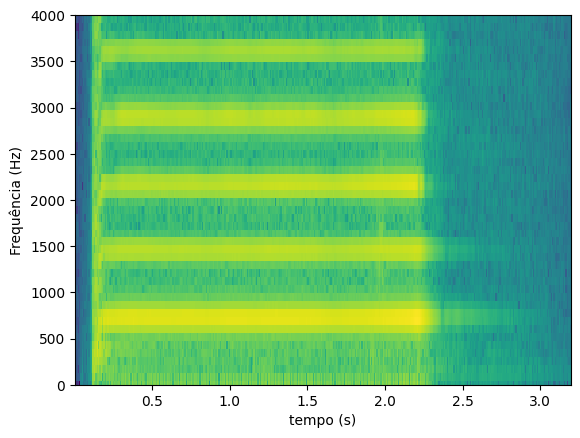

In [9]:
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0,4000])
plt.show()

In [14]:
#completando com zeros o array de audio com menor tamanho
dif_tamanho = abs(len(audio1) - len(audio2))

vet = np.zeros(dif_tamanho)
audio1 = np.concatenate((audio1, vet), axis=0)
# Somar os dois áudios
resultado_audio = audio1 + audio2

# Reproduzir o áudio resultante (opcional)
Audio(resultado_audio, rate=fs_audio2)

In [ ]:
freq,tempo,potencia = signal.spectrogram(resultado_audio,fs_audio1,window='hann', nperseg=512, noverlap=128)
#freq,tempo,potencia = signal.spectrogram(y0,Fs,'hamming',128,64)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html


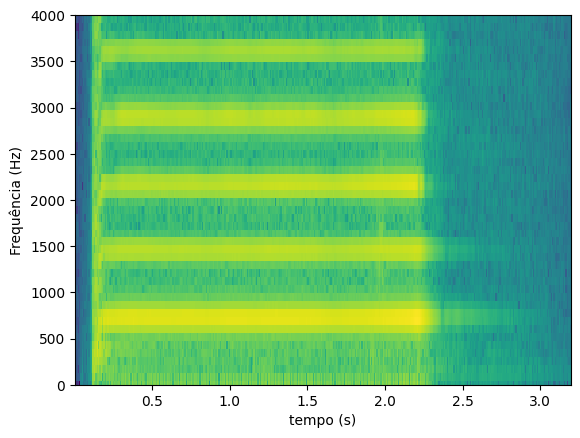

In [13]:
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0,4000])
plt.show()

In [25]:
Fs = fs_audio2
bw = 144
f0 = 554
Q = 3.85
B, A = signal.iirnotch(f0, Q, fs_audio2)

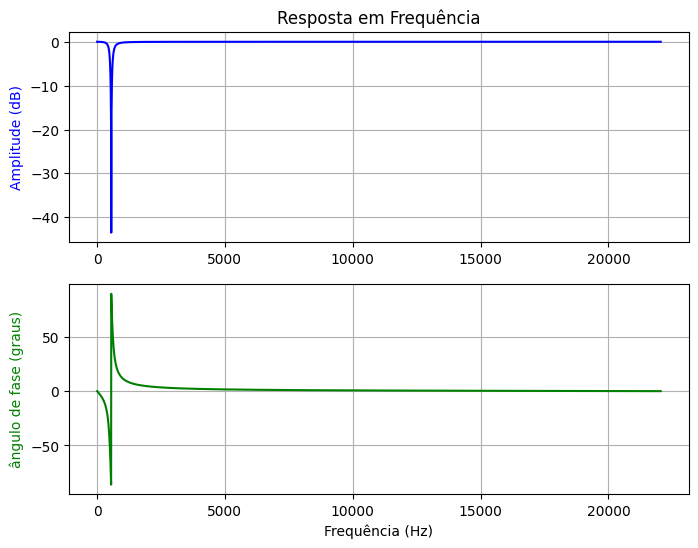

In [21]:
freq, h = signal.freqz(B, A, 4096, fs=Fs)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Resposta em Frequência")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("ângulo de fase (graus)", color='green')
ax[1].set_xlabel("Frequência (Hz)")
ax[1].grid(True)
plt.show()

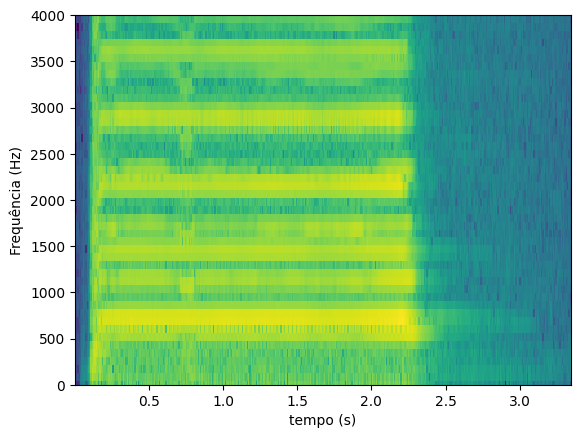

In [ ]:
sinal2_filtro = signal.lfilter(B, A, resultado_audio)
freq,tempo,potencia = signal.spectrogram(sinal2_filtro,fs_audio1,window='hann', nperseg=512, noverlap=128)

potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0,4000])
plt.show()


In [22]:
SOS0 = np.concatenate((B, A),axis=0)
y0 = signal.sosfilt(SOS0, audio2)

In [ ]:
Fs = fs_audio1  # Frequência de amostragem (Hz)
f0 = 554  # Frequência central do notch (Hz)

# Valores de Q que você deseja testar
valores_Q = [1.0, 2.0, 5.0]

# Plotar os sinais resultantes para diferentes valores de Q
plt.figure(figsize=(10, 6))

for Q in valores_Q:
    # Calcular os coeficientes do filtro notch para o valor atual de Q
    B, A = signal.iirnotch(f0, Q, Fs)

    # Exibir o espectro do filtro notch
    w, h = signal.freqz(B, A, worN=8000)
    plt.plot(0.5 * Fs * w / np.pi, np.abs(h), label=f'Q = {Q}')

plt.title('Resposta em Frequência do Filtro Notch para Diferentes Valores de Q')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Fs = 2000.0  # Frequência de amostragem (Hz)
f0 = 300.0  # Frequência central do notch (Hz)
Q = 2.0  # Fator de qualidade
B, A = signal.iirnotch(f0, Q, Fs) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html

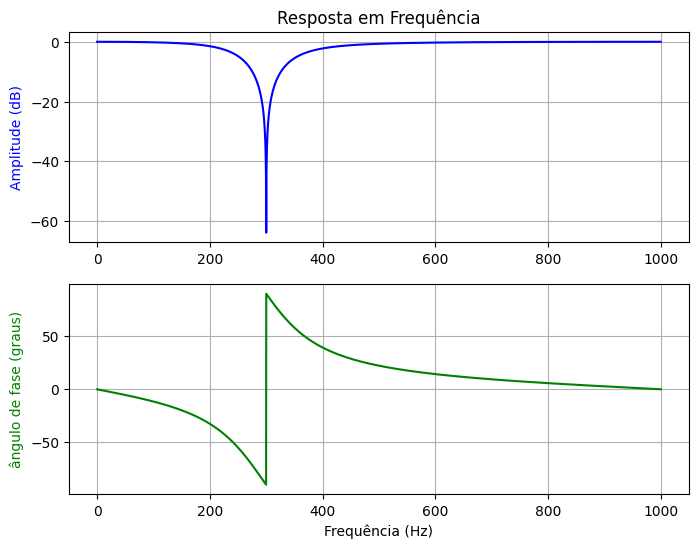

In [ ]:
# Resposta em frequência

freq, h = signal.freqz(B, A, 4096, fs=Fs)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Resposta em Frequência")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("ângulo de fase (graus)", color='green')
ax[1].set_xlabel("Frequência (Hz)")
ax[1].grid(True)
plt.show()

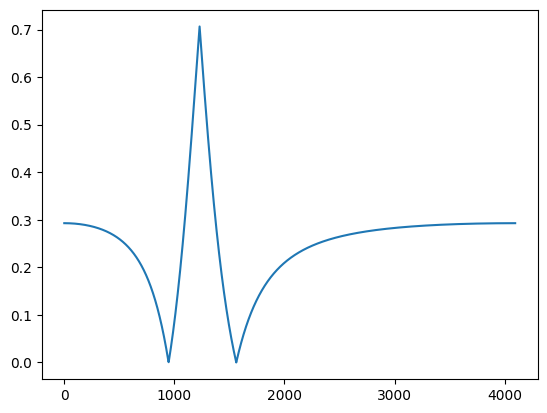

In [ ]:
# Procurando as frequências de corte:
abs_h_deslocado = abs(h) - max(abs(h)) + 1 # trazendo o topo de abs(h) para 0dB
vetor_distancias = abs(abs_h_deslocado-(1/np.sqrt(2))) # medindo as distâncias à amplitude nas frequências de corte
plt.plot(vetor_distancias)

In [ ]:
minimos_ordenados = np.argsort(vetor_distancias) # retorna os índices referentes à ordem crescente de distâncias
# as duas menores distâncias correspondem às frequências de corte do filtro notch

[231.4453125 380.859375 ]


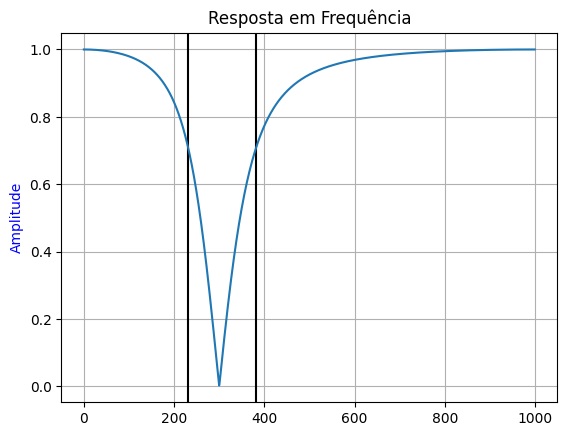

In [ ]:
index_freqs_corte = [minimos_ordenados[0], minimos_ordenados[1]]
freqs_corte = freq[index_freqs_corte]

plt.axvline(x = freqs_corte[0], color = 'k')
plt.axvline(x = freqs_corte[1], color = 'k')

plt.plot(freq, abs(h))
plt.title("Resposta em Frequência")
plt.ylabel("Amplitude", color='blue')
plt.grid(True)
print(freqs_corte)


Filtro notch de Nehorai/Ng

NEHORAI, A. “A Minimal Parameter Adaptive Notch Filter with Constrained
Poles and Zeros”, IEEE Transactions on Acoustics, Speech and Signal
Processing, v. 33, n. 4, pp. 983–996, August 1985.

NG, T. S. “Some Aspects of an Adaptive Digital Notch Filter with Constrained
Poles and Zeros”, IEEE Transactions on Acoustics, Speech, and Signal
Processing, v. 35, n. 2, pp. 158–161, February 1987.

In [ ]:
#O código está criando coeficientes para um filtro notch de segunda ordem
omega_0 = 2*np.pi*f0/Fs
rho_0 = 0.7 # raio do pólo
am_0 = -2*np.cos(omega_0)
B0 = np.array([1, am_0, 1]) #: Coeficientes do numerador
A0 = np.array([1, rho_0*am_0, rho_0**2])

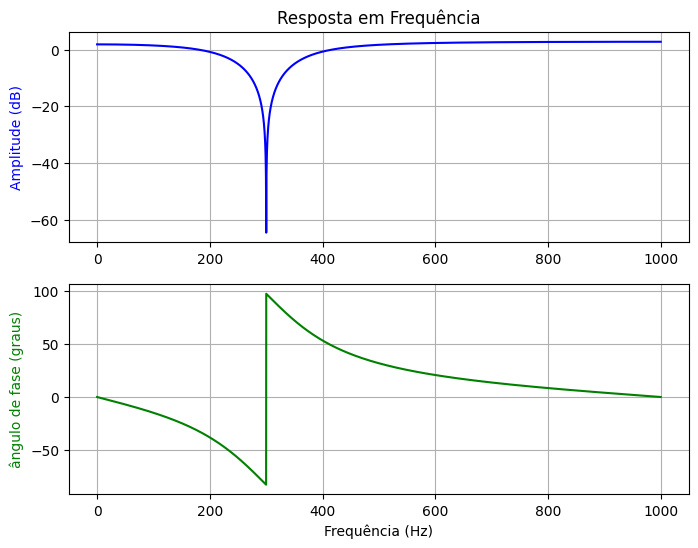

In [ ]:
# Resposta em frequência

freq, h0 = signal.freqz(B0, A0, 4096, fs=Fs)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h0)), color='blue')
ax[0].set_title("Resposta em Frequência")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h0))*180/np.pi, color='green')
ax[1].set_ylabel("ângulo de fase (graus)", color='green')
ax[1].set_xlabel("Frequência (Hz)")
ax[1].grid(True)
plt.show()

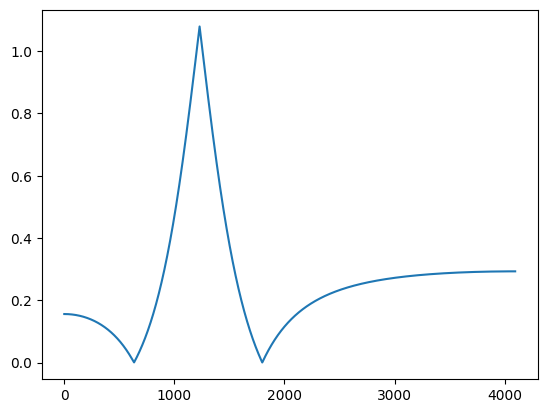

In [ ]:
# Procurando as frequências de corte:
abs_h0_deslocado = abs(h0) - max(abs(h0)) + 1 # trazendo o topo de abs(h) para 0dB
vetor_distancias = abs(abs_h0_deslocado-(1/np.sqrt(2))) # medindo as distâncias à amplitude nas frequências de corte
minimos_ordenados = np.argsort(vetor_distancias) # retorna os índices referentes à ordem crescente de distâncias

plt.plot(vetor_distancias)

[438.96484375 154.54101562]


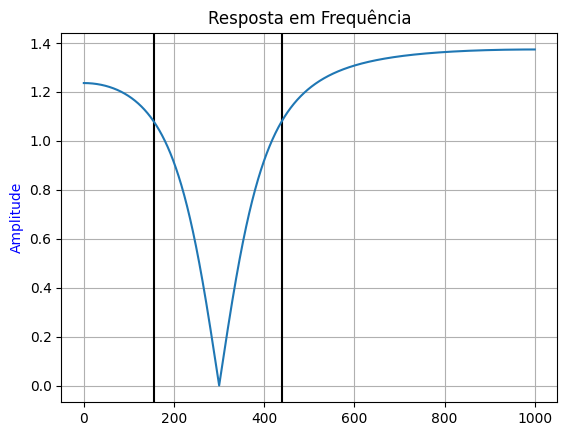

In [ ]:
# as duas menores distâncias correspondem às frequências de corte do filtro notch
index_freqs_corte = [minimos_ordenados[0], minimos_ordenados[1]]
freqs_corte = freq[index_freqs_corte]

# only one line may be specified; full height
plt.axvline(x = freqs_corte[0], color = 'k')
plt.axvline(x = freqs_corte[1], color = 'k')

#fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plt.plot(freq, abs(h0))
plt.title("Resposta em Frequência")
plt.ylabel("Amplitude", color='blue')
plt.grid(True)
print(freqs_corte)

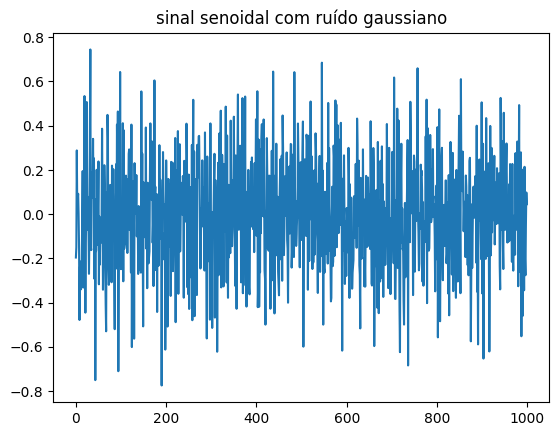

In [ ]:
# Ruído branco gaussiano
d = 0.5 # duração em segundos
N = np.round(d * Fs).astype(int) # número de amostras
n = np.arange(0,N) # índice amostral
sinal = np.random.normal(0, 0.25, N)
plt.plot(n, sinal)
plt.title('sinal senoidal com ruído gaussiano')
plt.axis('tight')
plt.show()


In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html
# Array of second-order filter coefficients, must have shape (n_sections, 6). Each row corresponds to a second-order section, with the first three columns providing the numerator coefficients and the last three providing the denominator coefficients.
SOS0 = np.concatenate((B0,A0),axis=0)
y0 = signal.sosfilt(SOS0, sinal)

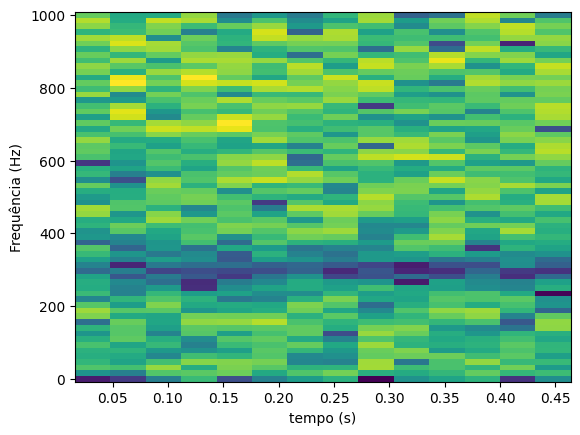

In [ ]:
freq,tempo,potencia = signal.spectrogram(y0,Fs,'hamming',128,64)
max_pot = np.max(potencia)
pot_norm = potencia/max_pot
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

Acrescentando mais uma sessão:


In [ ]:
f1 = 750
omega_1 = 2*np.pi*f1/Fs
rho_1 = 0.8 # raio do pólo
am_1 = -2*np.cos(omega_1)
B1 = np.array([1, am_1, 1])
A1 = np.array([1, rho_1*am_1, rho_1**2])

<ipython-input-19-286c1a85a83f>:6: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(freq, 20*np.log10(abs(h1)), color='blue')


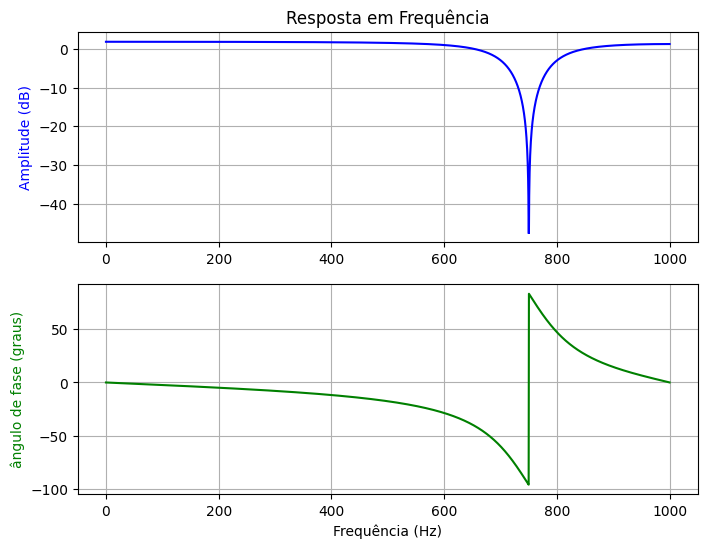

In [ ]:
# Resposta em frequência

freq, h1 = signal.freqz(B1, A1, 4096, fs=Fs)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h1)), color='blue')
ax[0].set_title("Resposta em Frequência")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h1))*180/np.pi, color='green')
ax[1].set_ylabel("ângulo de fase (graus)", color='green')
ax[1].set_xlabel("Frequência (Hz)")
ax[1].grid(True)
plt.show()

In [ ]:
# Resposta em frequência total:
H = h0*h1

<ipython-input-21-2900a288f014>:2: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(freq, 20*np.log10(abs(H)), color='blue')


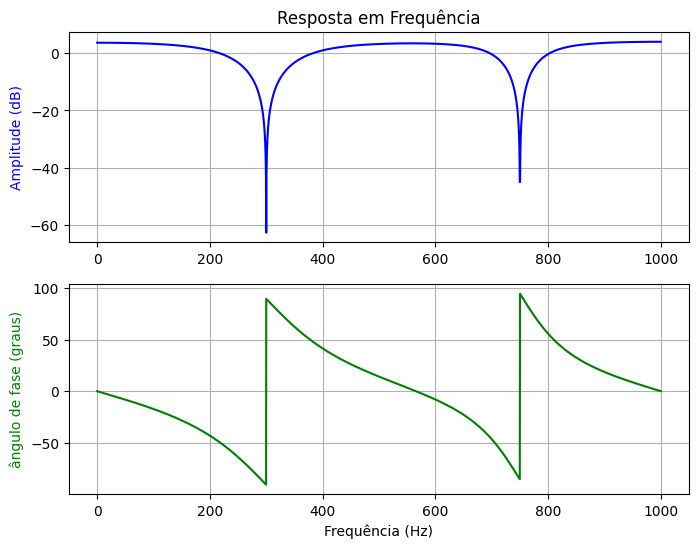

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(H)), color='blue')
ax[0].set_title("Resposta em Frequência")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(H))*180/np.pi, color='green')
ax[1].set_ylabel("ângulo de fase (graus)", color='green')
ax[1].set_xlabel("Frequência (Hz)")
ax[1].grid(True)
plt.show()

In [ ]:
# Array of second-order filter coefficients, must have shape (n_sections, 6). Each row corresponds to a second-order section, with the first three columns providing the numerator coefficients and the last three providing the denominator coefficients.
SOS1 = np.concatenate((B1,A1),axis=0)
SOS =  np.zeros([2,6])
SOS[0,:] = SOS0
SOS[1,:] = SOS1

In [ ]:
y = signal.sosfilt(SOS, sinal)

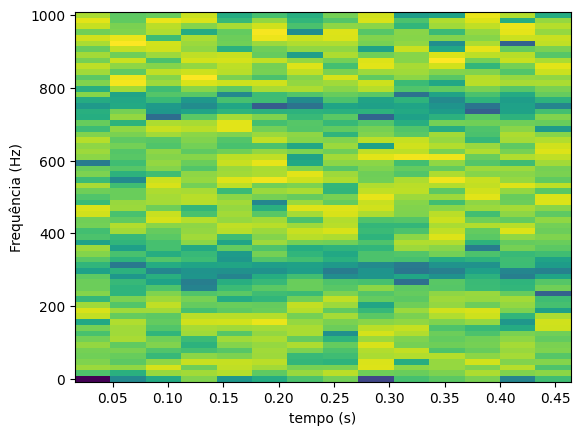

In [ ]:
freq,tempo,potencia = signal.spectrogram(y,Fs,'hamming',128,64)
max_pot = np.max(potencia)
pot_norm = potencia/max_pot
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()